# Cargar carpeta con datasets del concurso

In [2]:
# prompt: conexion a google drive

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/COQ-ESC-UCN/Classes/DeepLearning/DL-UCN-2025-01/Laboratorio/Lab01: Redes poco profundas

Mounted at /gdrive
/gdrive/MyDrive/COQ-ESC-UCN/Classes/DeepLearning/DL-UCN-2025-01/Laboratorio/Lab01: Redes poco profundas


# Carga de los datos

Tamaño del batch: torch.Size([8, 784])
Etiquetas: tensor([9, 4, 3, 6, 3, 1, 2, 2])





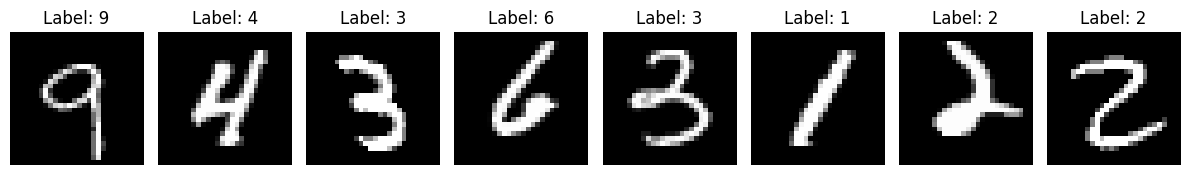

In [ ]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

# Cargar el archivo CSV
train_df = pd.read_csv("train.csv")  # Asegúrate de que el archivo esté en tu directorio actual

# Separar características y etiquetas
X = train_df.drop(columns=["label"]).values.astype("float32")
y = train_df["label"].values.astype("int64")

# Definir clase personalizada para Dataset
class MNISTDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features)
        self.labels = torch.tensor(labels)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# Crear el dataset y dataloader
mnist_dataset = MNISTDataset(X, y)
mnist_loader = DataLoader(mnist_dataset, batch_size=8, shuffle=True)

# Obtener el primer batch
images, labels = next(iter(mnist_loader))

# Mostrar imágenes con etiquetas
print("Tamaño del batch:", images.shape)
print("Etiquetas:", labels)
print(end='\n'*3)

plt.figure(figsize=(12, 2))
for i in range(len(images)):
    img = images[i].reshape(28, 28)  # Formato 28x28
    label = labels[i].item()

    plt.subplot(1, 8, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"Label: {label}")
    plt.axis("off")

plt.tight_layout()
plt.show()

# Problema completo

## 1. Carga de datos

In [3]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim

# 1. Cargar datos de entrenamiento
train_df = pd.read_csv("train.csv")
X_train = train_df.drop(columns=["label"]).values.astype("float32")
y_train = train_df["label"].values.astype("int64")

# 2. Dataset personalizado
class MNISTDataset(Dataset):
    def __init__(self, X, y=None):
        self.X = torch.tensor(X)
        self.y = torch.tensor(y) if y is not None else None

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        if self.y is not None:
            return self.X[idx], self.y[idx]
        return self.X[idx]

# 3. Crear dataset y dataloader
train_dataset = MNISTDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# 4. Modelo de regresión lineal simple (para clasificación)
class LinearModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)

model = LinearModel(784, 10)  # 10 clases (dígitos del 0 al 9)



## 2. Entrenamiento

In [4]:
# 5. Entrenamiento
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

epochs = 5
for epoch in range(epochs):
    for X_batch, y_batch in train_loader:
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{epochs} - Loss: {loss.item():.4f}")

Epoch 1/5 - Loss: 0.2623
Epoch 2/5 - Loss: 0.4294
Epoch 3/5 - Loss: 0.3691
Epoch 4/5 - Loss: 0.1889
Epoch 5/5 - Loss: 0.3587


## 3. Predicción y generación de archivo competencia

In [5]:
# 6. Cargar test.csv
test_df = pd.read_csv("test.csv")
X_test = test_df.drop(columns=["id"]).values.astype("float32")
ids = test_df["id"].values

# 7. Dataset y DataLoader para test
test_dataset = MNISTDataset(X_test)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 8. Predicciones
model.eval()
predictions = []

with torch.no_grad():
    for X_batch in test_loader:
        outputs = model(X_batch)
        _, preds = torch.max(outputs, 1)
        predictions.extend(preds.numpy())

# 9. Guardar archivo submit.csv
submit_df = pd.DataFrame({
    "id": ids,
    "label": predictions
})
submit_df.to_csv("submit.csv", index=False)

print("submit.csv generado exitosamente.")

submit.csv generado exitosamente.
